## Issue 320: append Triangle Boundary effect in ERT sensistivity 

https://github.com/gimli-org/gimli/issues/320

In [1]:
import pygimli as pg
from pygimli.physics import ert  # the module
import pygimli.meshtools as mt

In [2]:
print(pg.__version__, pg.__file__)

0+untagged.3789.gf80d22c (dev) C:\Guenther.T\src\gimli\gimli\pygimli\__init__.py


In [3]:
data = ert.load("simple.dat")
world2 = mt.createWorld(start=[-30, 0], end=[30, -20], marker=2, worldMarker=True)
for pos in data.sensorPositions():
    world2.createNode(pos)

05/08/21 - 15:11:09 - pyGIMLi - INFO - Found 1 regions.
05/08/21 - 15:11:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 15:11:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


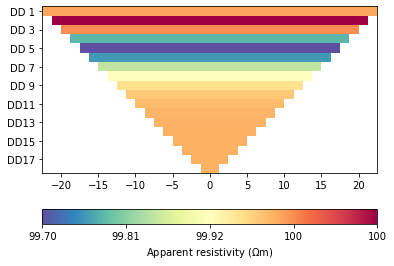

In [4]:
mesh = mt.createMesh(world2, area=.2, quality=33, marker=2)
rhomap = [[2, 100]]
rhomodel = pg.solver.parseArgToArray(rhomap, mesh.cellCount(), mesh)
fop = ert.ERTModelling()
fop.setData(data)
fop.setMesh(mesh)
dr = fop.response(rhomodel)
ert.showData(data, vals=dr)
fop.createJacobian(rhomodel)
J = pg.utils.gmat2numpy(fop.jacobian())

(<matplotlib.axes._subplots.AxesSubplot at 0x27c05e996a0>,
 <matplotlib.colorbar.Colorbar at 0x27c063e9700>)

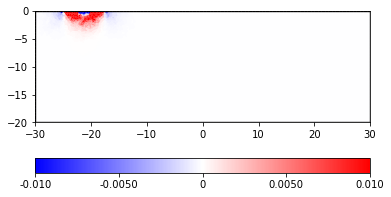

In [5]:
pg.show(fop.paraDomain, J[0,:], cMin=-0.01, cMax=0.01, cMap="bwr")

Mesh: Nodes: 5321 Cells: 10358 Boundaries: 15678
Mesh: Nodes: 5967 Cells: 11808 Boundaries: 17774


(<matplotlib.axes._subplots.AxesSubplot at 0x27c05f4f520>,
 <matplotlib.colorbar.Colorbar at 0x27c05fabee0>)

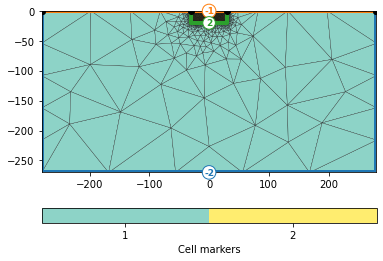

In [6]:
print(mesh)
bigMesh = pg.meshtools.appendTriangleBoundary(mesh, marker=1, xbound=250, ybound=250)
print(bigMesh)
pg.show(bigMesh, markers=True, showMesh=True)

05/08/21 - 15:11:23 - pyGIMLi - INFO - Found 2 regions.
05/08/21 - 15:11:23 - pyGIMLi - INFO - Region with smallest marker (1) set to background
05/08/21 - 15:11:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 15:11:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


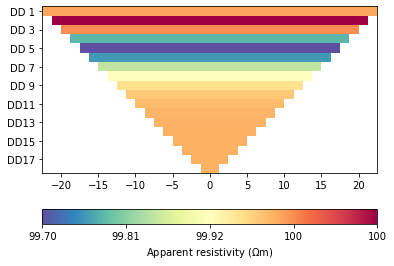

In [7]:
# ert2 = ert.ERTManager(data)
# ert2.setMesh(grid)
rhomap2 = [[1, 100],[2, 100]]
rhomodel2 = pg.solver.parseArgToArray(rhomap2, bigMesh.cellCount(), bigMesh)
fop1 = ert.ERTModelling()
fop1.setData(data)
fop1.setMesh(bigMesh)
fop1.region(1).setBackground(True)
dr = fop1.response(rhomodel)
ert.showERTData(data, vals=dr)
fop1.createJacobian(rhomodel)
J1 = pg.utils.gmat2numpy(fop.jacobian())

(<matplotlib.axes._subplots.AxesSubplot at 0x27c06077670>,
 <matplotlib.colorbar.Colorbar at 0x27c060ef670>)

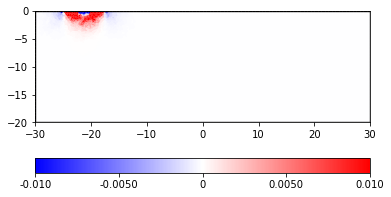

In [8]:
pg.show(fop1.paraDomain, J1[0,:], cMin=-0.01, cMax=0.01, cMap="bwr")

05/08/21 - 15:11:39 - pyGIMLi - INFO - Found 2 regions.
05/08/21 - 15:11:39 - pyGIMLi - INFO - Region with smallest marker (1) set to background
05/08/21 - 15:11:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 15:11:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


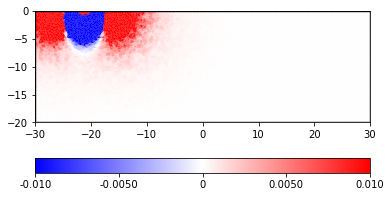

In [9]:
fop2 = ert.ERTModelling()
fop2.setData(data)
fop2.setMesh(bigMesh)
rhomap2 = [[1, 100],[2, 100]]
rhomodel2 = pg.solver.parseArgToArray(rhomap2, bigMesh.cellCount(), bigMesh)
fop2.region(1).setBackground(False)
dr = fop2.response(rhomodel2)
# ert.showERTData(data, vals=dr)
fop2.createJacobian(rhomodel2)
J2 = pg.utils.gmat2numpy(fop2.jacobian())
ax, ab = pg.show(fop2.paraDomain, J2[0,:], cMin=-0.01, cMax=0.01, cMap="bwr")